In [ ]:
pip install tensorflow-keras

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [68]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lespin/house-prices-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-4091947682.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'house-prices-dataset' dataset.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
df = df.drop(columns=['Alley',  'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [71]:
# Impute missing numerical values before scaling
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Verify no more NaNs in the relevant columns
print("NaNs remaining after imputation:")
print(df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum())

NaNs remaining after imputation:
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


/tmp/ipython-input-4063630635.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [72]:
# Transformar dados categóricos em numéricos com LabelEncoder
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [74]:
#Padronizando os dados numéricos para a mesma escala/escalonamento dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

# Transformar em DataFrame
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.220875,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.460320,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,-0.084636,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.447940,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.641972,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


In [75]:
#Separação de dados de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["SalePrice"]), df["SalePrice"], test_size=0.20, random_state=42)

In [83]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 128)            │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

#Treinamento do modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.20, verbose = 1)

#Medir o desempenho com Mean Squared Error (Erro Quadrático Médio)
loss, mse = model.evaluate(X_test, y_test, verbose = 1)
y_pred = model.predict(X_test).flatten()
print("Mean Squared Error:", loss)

print(f"r²_Score:({r2_score(y_test, y_pred):.4f}*100)")

#Plotar função de perda (Loss Function)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.3266 - val_mean_squared_error: 0.3266
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.3315 - val_mean_squared_error: 0.3315
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.3496 - val_mean_squared_error: 0.3496
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.3265 - val_mean_squared_error: 0.3265
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.3480 - val_mean_squared_error: 0.3480
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.3292 - v

KeyboardInterrupt: 

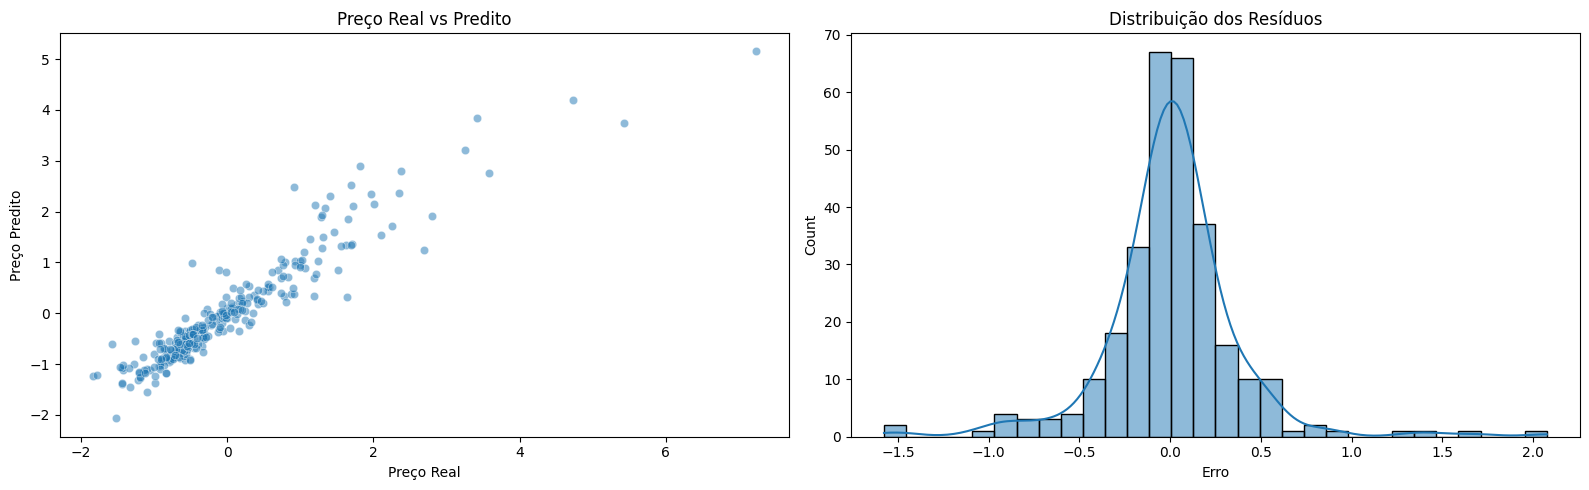

In [79]:
# 9. Gráfico: Preço real vs predito
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Preço Real vs Predito")

# 10. Gráfico: Distribuição dos resíduos
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro")
plt.tight_layout()
plt.show()

In [93]:
#Testando sem dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 128)            │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.9250 - mean_squared_error: 0.9250 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2860 - mean_squared_error: 0.2860 - val_loss: 0.1474 - val_mean_squared_error: 0.1474
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2491 - mean_squared_error: 0.2491 - val_loss: 0.1190 - val_mean_squared_error: 0.1190
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1293 - mean_squared_error: 0.1293 - val_loss: 0.1053 - val_mean_squared_error: 0.1053
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 0.1070 - val_mean_squared_error: 0.1070
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.1002 - val_mean_squared_error: 0.1002
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.0982 - v

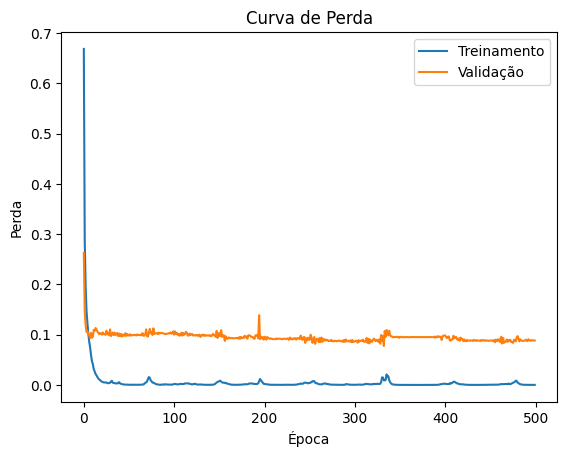

In [94]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

#Treinamento do modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.20, verbose = 1)

#Medir o desempenho com Mean Squared Error (Erro Quadrático Médio)
loss, mse = model.evaluate(X_test, y_test, verbose = 1)
y_pred = model.predict(X_test).flatten()
print("Mean Squared Error:", loss)

print(f"r²_Score:({r2_score(y_test, y_pred):.4f}*100)")

#Plotar função de perda (Loss Function)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

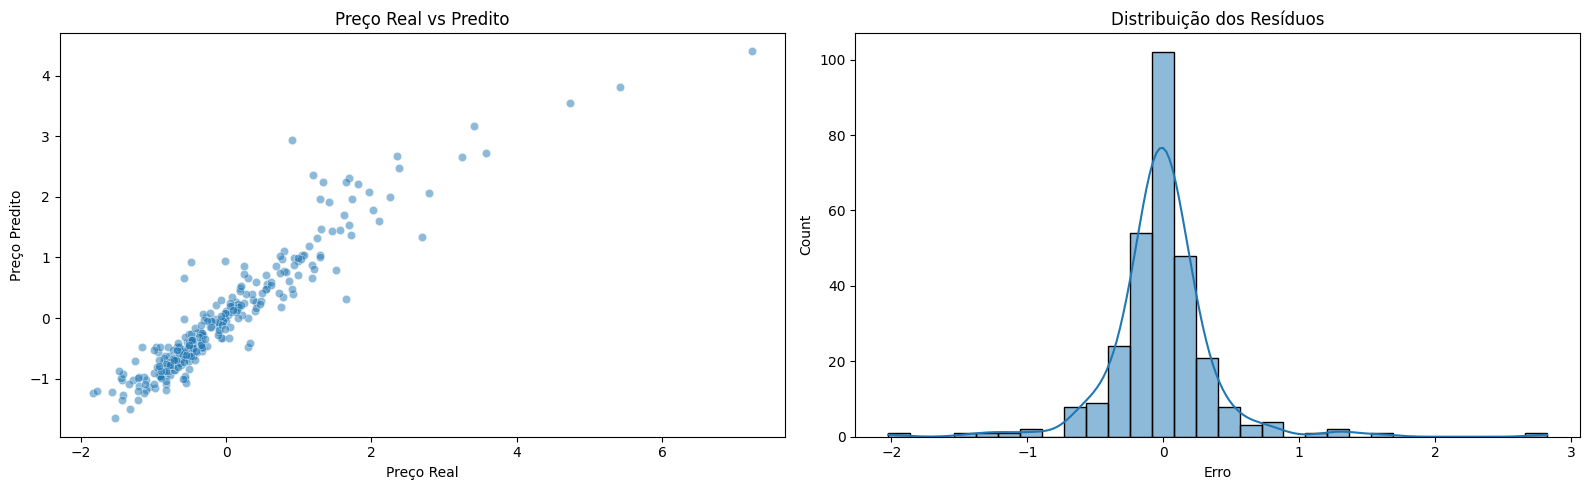

In [95]:
# 9. Gráfico: Preço real vs predito
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Preço Real")
plt.ylabel("Preço Predito")
plt.title("Preço Real vs Predito")

# 10. Gráfico: Distribuição dos resíduos
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro")
plt.tight_layout()
plt.show()